
# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sales.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

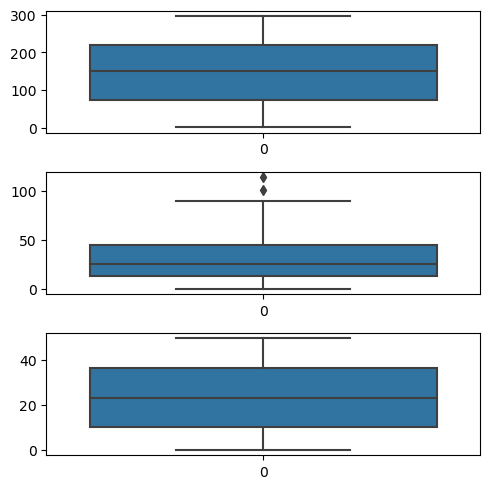

In [10]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

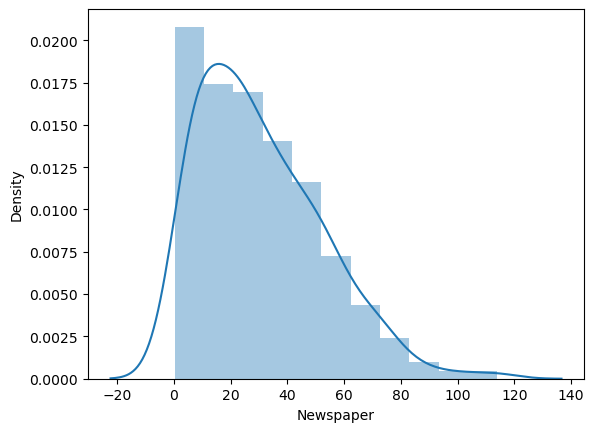

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr=df.Newspaper.quantile(0.75)-df.Newspaper.quantile(0.25)

In [13]:
lower_bridge=df['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
data=df.copy()

In [15]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<Axes: >

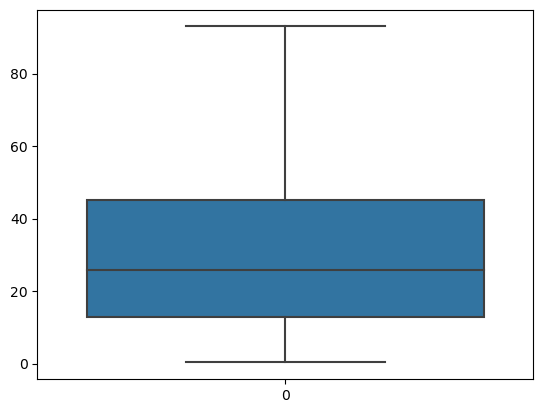

In [16]:
sns.boxplot(data['Newspaper'])

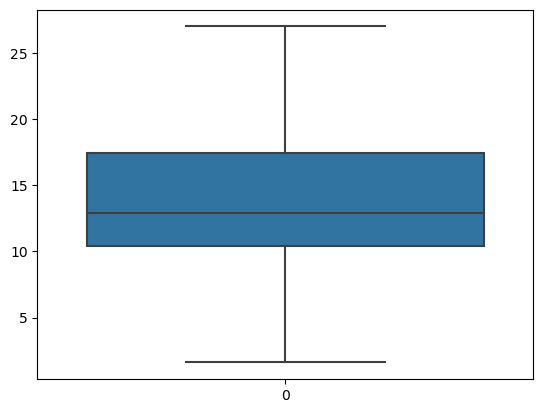

In [19]:
sns.boxplot(data['Sales']);

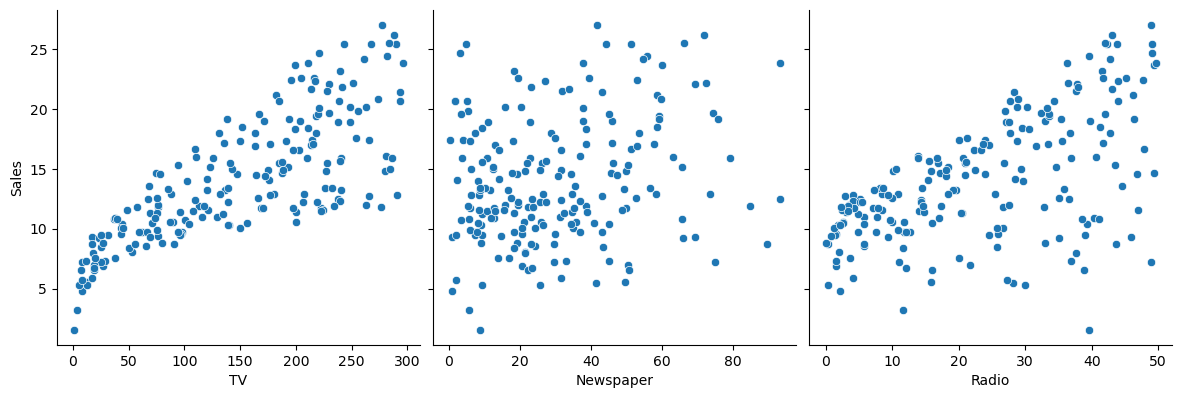

In [21]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

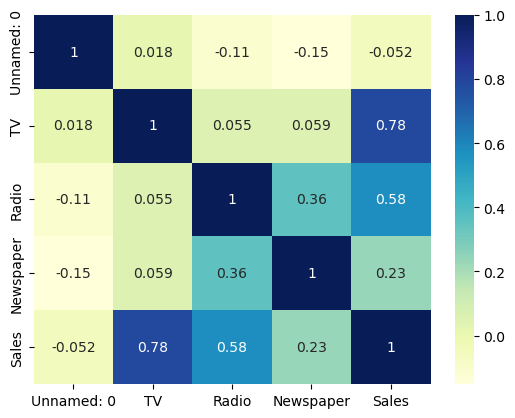

In [22]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [24]:
important_features=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [25]:
print(important_features)

['TV', 'Radio', 'Sales']


In [26]:
x=data['TV']
y=data['Sales']

In [27]:
x=x.values.reshape(-1,1)

In [28]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [31]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [34]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [36]:
knn_train_pred=knn.predict(x_train)

In [37]:
knn_test_pred=knn.predict(x_test)

In [38]:
print(knn_train_pred,knn_test_pred)

[23.48 21.92 17.08  7.44 17.98  9.6   4.64  9.98 14.92 13.3  18.32 20.06
 13.08  9.6  18.4  16.86 20.38 10.1  16.9  16.52  7.22 16.04 21.62 13.8
 20.22 19.16  5.38 15.28 23.5  13.84 21.62  8.34 16.06  9.92 10.1  12.64
 10.68 12.34 13.08 15.9  12.9  18.32 18.26 15.26 12.78  4.64  9.8   7.22
 12.04 18.96  9.8   9.68 15.28 17.1   8.26  7.22 15.28 11.22  9.6   7.88
 17.1  13.84 11.28 10.5  16.9  16.44 11.22 17.1  12.04 16.76 13.08 12.34
 17.28 10.68 16.06 19.9  17.98 12.04 16.06  5.38 12.04 13.58 11.28 13.08
 18.96 16.04  9.78 14.18 16.04 13.24  9.78  7.28 15.28 16.72 19.38 12.78
 18.32 17.98 15.9   8.26  8.26 11.22 13.76 14.04 23.5  17.16 13.76 18.96
 15.7  14.76 14.18 14.32  8.26 10.86 22.88  7.44 16.06  7.44  5.38 13.08
 11.22 21.62 17.56 16.06 11.    9.8  23.5  15.28 12.9   9.68 16.04  8.8
 17.08 18.32] [12.04  7.28 16.56 17.98  7.44 16.9  10.1   7.88  9.8  17.1  12.9  15.7
 10.1  18.96 12.78 11.   20.54 16.44  7.22 17.48 14.64 18.4  16.7   9.78
 18.7  10.36 17.56 15.26 12.04 12.04 17.

In [39]:
Results=pd.DataFrame(columns=['Model','Train R2','Test R2','Test RMSE','Varience'])

In [44]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
varience=r2_train-r2
Results=Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.45996802760542443
RMSE: 3.69958720055974


In [45]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Varience
0,K-Nearest Neighbors,0.681487,0.459968,3.699587,0.221519
1,K-Nearest Neighbors,0.681487,0.459968,3.699587,0.221519


In [46]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [47]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [48]:
print(svr_train_pred,svr_test_pred)

[19.76478257 19.75083532 15.95518418  8.1513396  19.42380657  9.54019619
  8.06347282  9.35923534 14.60210081 12.94442232 17.29176709 19.00901479
 12.14681774  9.4809788  18.92192351 15.36515825 17.38693025  8.97149841
 15.65285693 18.12469529  8.19235381 17.49828192 19.75501541 13.54567078
 17.2130959  17.17367106  8.06596295 14.3479099  19.67596749 13.74788071
 19.75092243  8.40678401 18.51721453  9.76122827  8.97971964 11.66146564
 10.07268303 13.26371474 13.18065758 16.73172442 11.88291065 17.10596387
 19.38192458 14.9898222  12.33943531  8.08036677 11.21330323  8.18866052
 10.36466069 16.2772222  11.27860622  8.67720678 14.45622411 17.98792802
  8.31013051  8.17612511 14.39936943 11.01568195  9.6365073   8.3758051
 18.01971223 13.66554575 10.58925675 11.04660072 15.49194506 16.94749382
 10.90469889 17.92398583 10.41531493 18.24853898 13.10739607 13.21748736
 18.6032471  10.14705966 18.52686753 19.67309788 19.49316776 10.35543785
 18.51237945  8.06711957 10.37387964 12.56430999 10.

In [50]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
Varience=r2_train-r2
Results=Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5279418024630043
RMSE: 3.458926261853526


In [51]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Varience
0,K-Nearest Neighbors,0.681487,0.459968,3.699587,0.221519
1,K-Nearest Neighbors,0.681487,0.459968,3.699587,0.221519
2,Support Vector Machine,0.625702,0.527942,3.458926,0.221519


In [52]:
import statsmodels.api as sm

In [53]:
x_train_constant=sm.add_constant(x_train)

In [54]:
model=sm.OLS(y_train,x_train_constant).fit()

In [55]:
model.params

const    6.594006
x1       0.050096
dtype: float64

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     244.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           7.61e-32
Time:                        08:16:22   Log-Likelihood:                -342.96
No. Observations:                 134   AIC:                             689.9
Df Residuals:                     132   BIC:                             695.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5940      0.543     12.151      0.0

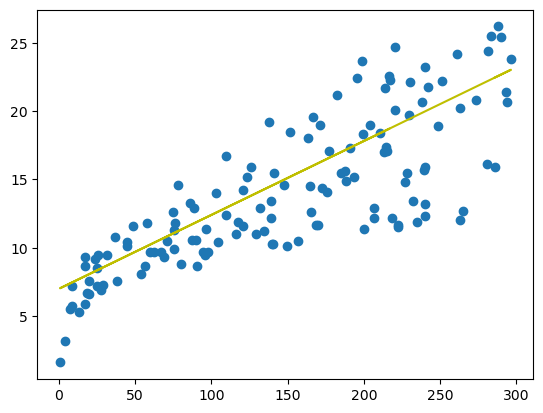

In [57]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [58]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

188   -5.021432
98     4.293213
85    -1.072533
192   -1.555655
54     0.445803
         ...   
195   -0.907669
128    7.069869
66     1.327973
187    1.132669
52     5.165243
Name: Sales, Length: 134, dtype: float64

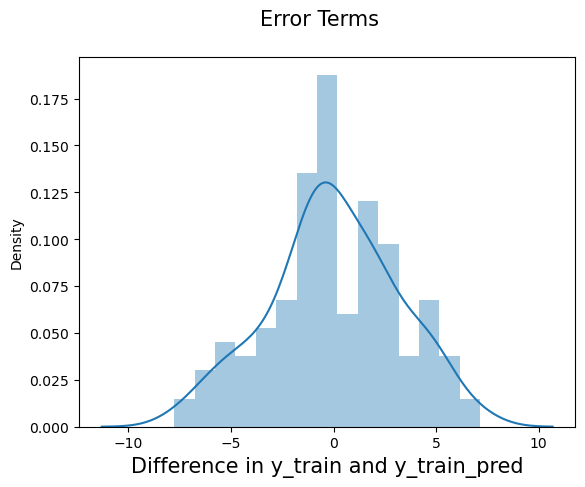

In [61]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()

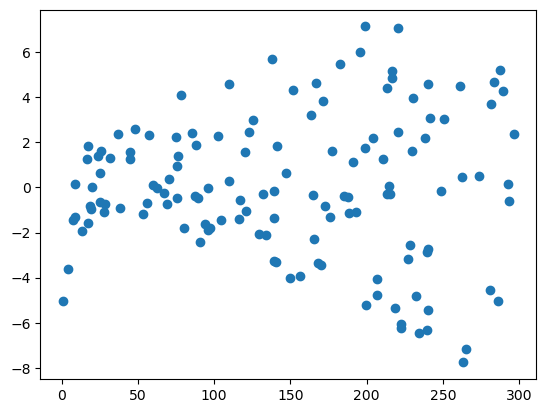

In [62]:
plt.scatter(x_train,res)
plt.show()

In [63]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [64]:
y_pred

array([10.33616916,  7.25527163, 17.81548625, 19.96460014,  7.49072233,
       15.85673677,  8.74812929,  7.9365758 , 11.29801034, 18.01586983,
       11.97430492, 16.00702445,  8.75313888, 16.6031656 , 12.61553237,
       11.62363366, 20.45553991, 17.09410537,  7.53580864, 17.15422044,
       17.90565886, 19.03782609, 15.6513436 ,  9.90534446, 16.29758064,
       10.02056502, 18.48677124, 15.365797  , 10.41632259, 10.42133218,
       18.77732743, 17.53494924, 19.30834392,  9.09880056, 12.13962137,
        6.9847538 , 10.06064174, 19.89947548, 13.16157763, 18.48677124,
       12.24983234, 16.73842451, 17.49988212, 17.60508349, 13.41706669,
        7.02483051, 15.4609792 , 20.46555909, 20.63087554, 21.15688244,
       16.86366425, 13.75270918, 19.38849735,  6.86452365, 16.49295463,
        9.99050748, 20.83626871, 14.77466544,  8.57279366, 13.36697079,
       16.49295463, 10.2710445 , 11.46332679,  8.49764982,  7.18012779,
       14.09336127])

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.485078067861415

In [67]:
r2=r2_score(y_test,y_pred)
r2

0.5207766637038126

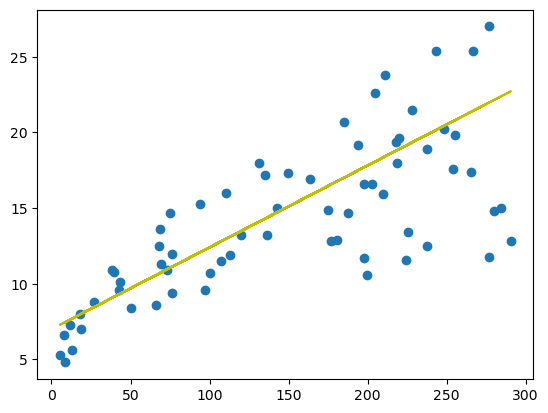

In [68]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()